In [1]:
import pandas as pd

In [2]:
path = '../data/traits.csv'
data = pd.read_csv(path)
data.head()

,species,gram_stain,oxygen_tolerance,habitat,pathogenic,antibiotic_resistance
0,Escherichia_coli,negative,facultative,human_gut,yes,variable
1,Staphylococcus_aureus,positive,facultative,human_skin,yes,medium
2,Bacillus_subtilis,positive,aerobic,soil,no,low
3,Lactobacillus_acidophilus,positive,anaerobic,human_gut,no,low
4,Pseudomonas_aeruginosa,negative,aerobic,water,yes,high


In [3]:
bacteria = data["species"]

traits = pd.get_dummies(data.drop(columns=["species"]))

print(traits.head(5))

   gram_stain_negative  gram_stain_positive  gram_stain_variable  \
0                 True                False                False   
1                False                 True                False   
2                False                 True                False   
3                False                 True                False   
4                 True                False                False   

   oxygen_tolerance_aerobic  oxygen_tolerance_anaerobic  \
0                     False                       False   
1                     False                       False   
2                      True                       False   
3                     False                        True   
4                      True                       False   

   oxygen_tolerance_facultative  oxygen_tolerance_microaerophilic  \
0                          True                             False   
1                          True                             False   
2                         Fal

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2 , perplexity=5 , random_state=42)
reduced = tsne.fit_transform(traits)

In [5]:
import matplotlib.pyplot as plt

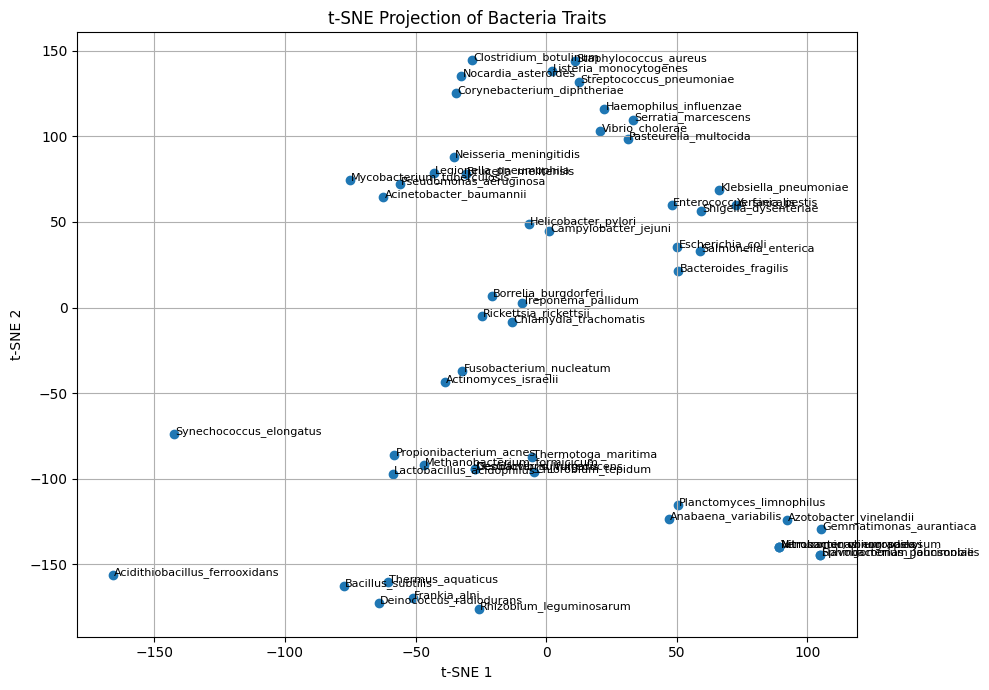

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(reduced[:,0] , reduced[:,1])

for i, name in enumerate(bacteria):
    plt.text(reduced[i, 0] + 0.5, reduced[i, 1], name, fontsize=8)

plt.title("t-SNE Projection of Bacteria Traits")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.tight_layout()
plt.show()
